# Preprocessing

## Removing Stop Words

In [50]:
from LughaatNLP import LughaatNLP
urdu_text_processing = LughaatNLP()
import pandas as pd
# Read data from the CSV file
file_path = 'urdu_sarcastic_dataset.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

In [51]:
with open("stop_words.txt", 'r', encoding='utf-8') as file: #Taken stopwords data from "https://github.com/SyedMuhammadMuhsinKarim/Urdu-Stop-Words/blob/main/stop_words.txt"
    urdu_stopwords = file.read().splitlines()
# List of sentiment-carrying words that should not be removed
sentiment_words = set([
    "نہیں", "برا", "اچھا", "ٹھیک", "بہت", "محبت", "نفرت", "پسند", 
    "زیادہ", "کم", "بہترین"
])

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure the text is a string
        # Split the text into words
        words = text.split()
        # Remove stopwords unless they are sentiment-carrying words
        filtered_words = [word for word in words if word not in urdu_stopwords or word in sentiment_words]
        # Join the filtered words back into a single string
        return ' '.join(filtered_words)
    return text  # Return original value if not a string

In [52]:
df['urdu_text'] = df['urdu_text'].apply(remove_stopwords)

print(df['urdu_text'].head())

0                   🤣😂😂 شادی فسادن ٹھیک کوجی نہیں 😐😐😐🤣
1     چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی آں میں😂😂
2    کامران خان دن بھریہ زمہ داری لگائی اپوزیشن کرد...
3                                         نہیں پائین 😎
4          `` مراد علی شاہ بھیس ڈی جی ایس '' حامد میر😁
Name: urdu_text, dtype: object


## Reming URLs, Emojies, Hashtags

In [53]:
import re
# Define a dictionary to translate emojis into sentiment
emoji_sentiment = {
    "😊": "مثبت",  # Positive
    "😢": "منفی",  # Negative
    "😂": "مثبت",  # Positive
    "😍": "مثبت",  # Positive
    "😡": "منفی",  # Negative
    "😭": "منفی",  # Negative
    "👍": "مثبت",  # Positive
    "👎": "منفی",  # Negative
    "😎": "مثبت",  # Positive
    "😔": "منفی"   # Negative
}

def clean_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        # Removing URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # Removing hashtags
        text = re.sub(r'#\S+', '', text)  # Remove hashtags
        
        # Removing punctuation
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        
        # Translating emojis to sentiment
        for emoji, sentiment in emoji_sentiment.items():
            if emoji in text:
                text = text.replace(emoji, sentiment)  # Replace emoji with its sentiment
        text = re.sub(r'[\U0001F600-\U0001F64F]', '', text)  # Remove emojis from the emoticon range
        text = re.sub(r'[\U0001F300-\U0001F5FF]', '', text)  # Remove miscellaneous symbols and pictographs
        text = re.sub(r'[\U0001F680-\U0001F6FF]', '', text)  # Remove transport and map symbols
        text = re.sub(r'[\U0001F700-\U0001F77F]', '', text)  # Remove alchemical symbols
        text = re.sub(r'[\U0001F900-\U0001F9FF]', '', text)  # Remove supplemental symbols and pictographs
        text = re.sub(r'[\U00002700-\U000027BF]', '', text)  # Remove dingbats
        
        return text  # Return cleaned text
    return text  # Return original value if not a string

In [54]:
df["urdu_text"] = df["urdu_text"].apply(clean_text)
# the cleaned text
print(df['urdu_text'].head())

0                           شادی فسادن ٹھیک کوجی نہیں 
1       چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی آں میں
2    کامران خان دن بھریہ زمہ داری لگائی اپوزیشن کرد...
3                                          نہیں پائین 
4                مراد علی شاہ بھیس ڈی جی ایس  حامد میر
Name: urdu_text, dtype: object


## Removing Short Conversations 

In [55]:
# Function to filter out very short posts
def filter_short_posts(text):
    if isinstance(text, str):  # Ensure the text is a string
        # Split the text into words
        words = text.split()
        # Check if the number of words is 3 or more
        return len(words) >= 3
    return False  # Return False if not a string


In [56]:

df = df[df["urdu_text"].apply(filter_short_posts)]
print(df['urdu_text'])

0                               شادی فسادن ٹھیک کوجی نہیں 
1           چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی آں میں
2        کامران خان دن بھریہ زمہ داری لگائی اپوزیشن کرد...
4                    مراد علی شاہ بھیس ڈی جی ایس  حامد میر
5                            قابل اعتبار قاتل اعتبار ہوتے 
                               ...                        
19999    راجہ صاحب توڑ سنگ تکر چھڈیا ہن آواز نئی نکل رئ...
20000                              بےبی پرائم منسٹر بن گئی
20001                   اتنا بونگا وزیر اعظم ڈھونڈنے نہیں 
20002                        کاکا عدت نہیں  عوام تیری مدت 
20003    جتنا مرضی بلیک میل لیں این آر او نہیں دوں گاجت...
Name: urdu_text, Length: 18394, dtype: object


# Stemming and Lemmatization

## Stemming

In [57]:

def stem_text(sentence):
     stemmed_sentence = urdu_text_processing.urdu_stemmer(sentence)
     return stemmed_sentence

# Applying the stemming to the 'urdu_text' column
df['stemmed_text'] = df['urdu_text'].apply(stem_text)

# the original and stemmed texts
print(df[['urdu_text', 'stemmed_text']].head(10))


                                            urdu_text  \
0                          شادی فسادن ٹھیک کوجی نہیں    
1      چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی آں میں   
2   کامران خان دن بھریہ زمہ داری لگائی اپوزیشن کرد...   
4               مراد علی شاہ بھیس ڈی جی ایس  حامد میر   
5                       قابل اعتبار قاتل اعتبار ہوتے    
6                         انساں تھکا دیتا سوچوں سفر     
7                                 حامد میر صاحب ویلڈن   
8   یار وچارہ ویلا ہوندا آرے ہویا ہے تسی تے پکے نج...   
9                           سمجھتے پاکستان بیوقوف ھے    
10                             تسی لڑاںی کروانی ساڈی    

                                         stemmed_text  
0                            شادی فسادن ٹھیک کوجی نہا  
1         چل مہمانا کھانا سرو چڑیل چاچی نا دسدی آں ما  
2   کامران خان دن بھریہ زمہ داری لگائی اپوزیشن کرد...  
4                مراد علی شاہ بھیس ڈی جی ایس حامد میر  
5                          قابل اعتبر قاتل اعتبر ہوتہ  
6                             انساں 

## Lemmatization

In [58]:
def lemmatize_sentence(sentence):
    lemmatized_sentence = urdu_text_processing.lemmatize_sentence(sentence)
    return lemmatized_sentence

# Applying lemmatization to each sentence in the DataFrame
df['lemmatized_text'] = df['urdu_text'].apply(lemmatize_sentence)

print(df[['urdu_text', 'lemmatized_text']])

                                               urdu_text  \
0                             شادی فسادن ٹھیک کوجی نہیں    
1         چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی آں میں   
2      کامران خان دن بھریہ زمہ داری لگائی اپوزیشن کرد...   
4                  مراد علی شاہ بھیس ڈی جی ایس  حامد میر   
5                          قابل اعتبار قاتل اعتبار ہوتے    
...                                                  ...   
19999  راجہ صاحب توڑ سنگ تکر چھڈیا ہن آواز نئی نکل رئ...   
20000                            بےبی پرائم منسٹر بن گئی   
20001                 اتنا بونگا وزیر اعظم ڈھونڈنے نہیں    
20002                      کاکا عدت نہیں  عوام تیری مدت    
20003  جتنا مرضی بلیک میل لیں این آر او نہیں دوں گاجت...   

                                         lemmatized_text  
0                              شادی فسادن ٹھیک کوجی نہیں  
1           چلنا مہمان کھا سرا چڑیل چاچی نوں دسدی آں میں  
2      کامران خان دن بھریہ زمہ داری لگنا اپوزیشن کردا...  
4                 مراد علی شاہ بھیس ڈی جینا

# Feature Extraction from Urdu Text

## Tokenization

In [59]:
def tokenize_urdu(text):
    tokens = urdu_text_processing.urdu_tokenize(text)
    return tokens

df['tokenized_text'] = df['lemmatized_text'].apply(tokenize_urdu)

print(df[['lemmatized_text', 'tokenized_text']].head(5))

                                     lemmatized_text  \
0                          شادی فسادن ٹھیک کوجی نہیں   
1       چلنا مہمان کھا سرا چڑیل چاچی نوں دسدی آں میں   
2  کامران خان دن بھریہ زمہ داری لگنا اپوزیشن کردا...   
4             مراد علی شاہ بھیس ڈی جینا ایس حامد میر   
5                       قابل اعتبار قاتل اعتبار ہونا   

                                      tokenized_text  
0                    [شادی, فسادن, ٹھیک, کوجی, نہیں]  
1  [چلنا, مہمان, کھا, سرا, چڑیل, چاچی, نوں, دسدی,...  
2  [کامران, خان, دن, بھریہ, زمہ, داری, لگنا, اپوز...  
4   [مراد, علی, شاہ, بھیس, ڈی, جینا, ایس, حامد, میر]  
5                 [قابل, اعتبار, قاتل, اعتبار, ہونا]  


## TF - IDF 

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=tokenize_urdu)

# Fit and transform the Urdu text data directly
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Calculate the mean TF-IDF scores for each term
tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Create a DataFrame to hold terms and their scores
tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort the DataFrame by TF-IDF score in descending order and get the top 10 terms
top_terms = tfidf_df.sort_values(by='TF-IDF Score', ascending=False).head(10)

# Display the top 10 terms with their TF-IDF scores
print(top_terms)

c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


       Term  TF-IDF Score
17181  ہونا      0.032453
12106  نہیں      0.028525
2438    ایک      0.013616
1551   اللہ      0.011632
3148   بننا      0.011569
2530    بات      0.011168
5046   جینا      0.010781
10057  لگنا      0.010322
16857    ھے      0.010240
5362    خان      0.010199


## Word to Vec

In [61]:
from gensim.models import Word2Vec

tokenized_corpus = df['tokenized_text'].tolist()

# Training the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0)

# Finding the top 5 most similar words to "اچھا"
similar_words = model.wv.most_similar('اچھا', topn=5)

# Displaying the results
print("Top 5 words similar to 'اچھا':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Top 5 words similar to 'اچھا':
لوگ: 0.9880
ہونا: 0.9865
انسان: 0.9815
دل: 0.9799
ہنسنا: 0.9769


# N-grams Analysis

## Unigram, Bigram, and Trigram Analysis:

In [62]:
from nltk import ngrams
from collections import Counter


tokenized_corpus = df['tokenized_text'].tolist()

# Flatten the list of tokenized sentences into a single list of words
flat_tokens = [token for sublist in tokenized_corpus for token in sublist]

# Creating bigrams
bigrams = list(ngrams(flat_tokens, 2))

# Creating trigrams
trigrams = list(ngrams(flat_tokens, 3))

# Calculating frequencies
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

#10 most common bigrams and their frequencies
top_10_bigrams = bigram_freq.most_common(10)

#10 most common trigrams and their frequencies
top_10_trigrams = trigram_freq.most_common(10)

# Display results for bigrams
print("Top 10 Bigrams:")
for bigram, freq in top_10_bigrams:
    print(f"{' '.join(bigram)}: {freq}")

# Display results for trigrams
print("\nTop 10 Trigrams:")
for trigram, freq in top_10_trigrams:
    print(f"{' '.join(trigram)}: {freq}")

Top 10 Bigrams:
عمران خان: 506
نواز شریف: 449
نہیں ہونا: 317
سندھ پولیس: 305
ہونا ہونا: 224
آرمی چیف: 223
جزاک اللہ: 198
خان صاحب: 182
کیپٹن صفدر: 179
اردو زبان: 170

Top 10 Trigrams:
صلی اللہ علیہ: 108
اللہ علیہ وآلہ: 87
علیہ وآلہ وسلم: 87
پینا ڈی ایم: 86
پٹواریوں کی مادرملت: 77
جزاک اللہ خیر: 77
فالو فالو بیک: 71
بزدارکی پرواز بلاول: 60
خاتم النبیین محمدﷺ: 57
پرواز بلاول بیکار: 55


# Sentiment Classification Model

## Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['lemmatized_text'], df['is_sarcastic'], test_size=0.2, random_state=42
)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=tokenize_urdu)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# using SVM
model = SVC()
model.fit(X_train_tfidf, y_train)

# predictions
y_pred = model.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-score: 0.81


# Evaluation &amp; Optimization

## Evaluation

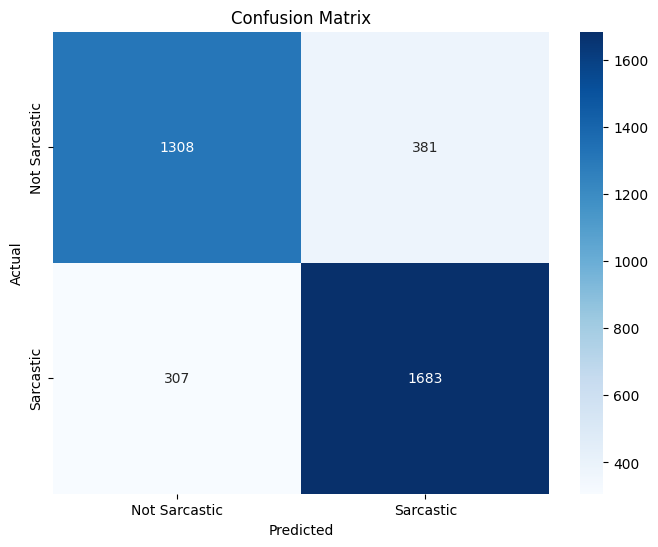

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sarcastic', 'Sarcastic'], 
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
